Masukkan nama txt file yang ingin diolah (dalam folder test) : petaITBDago.txt


Buka folder test dan buka file CaptureFixv1.0.png untuk melihat peta!


Masukkan node terdekat dengan posisi anda: A25
Masukkan node terdekat dengan tujuan anda: A5

Jarak dari A25 ke A5: 0.8514510241959243


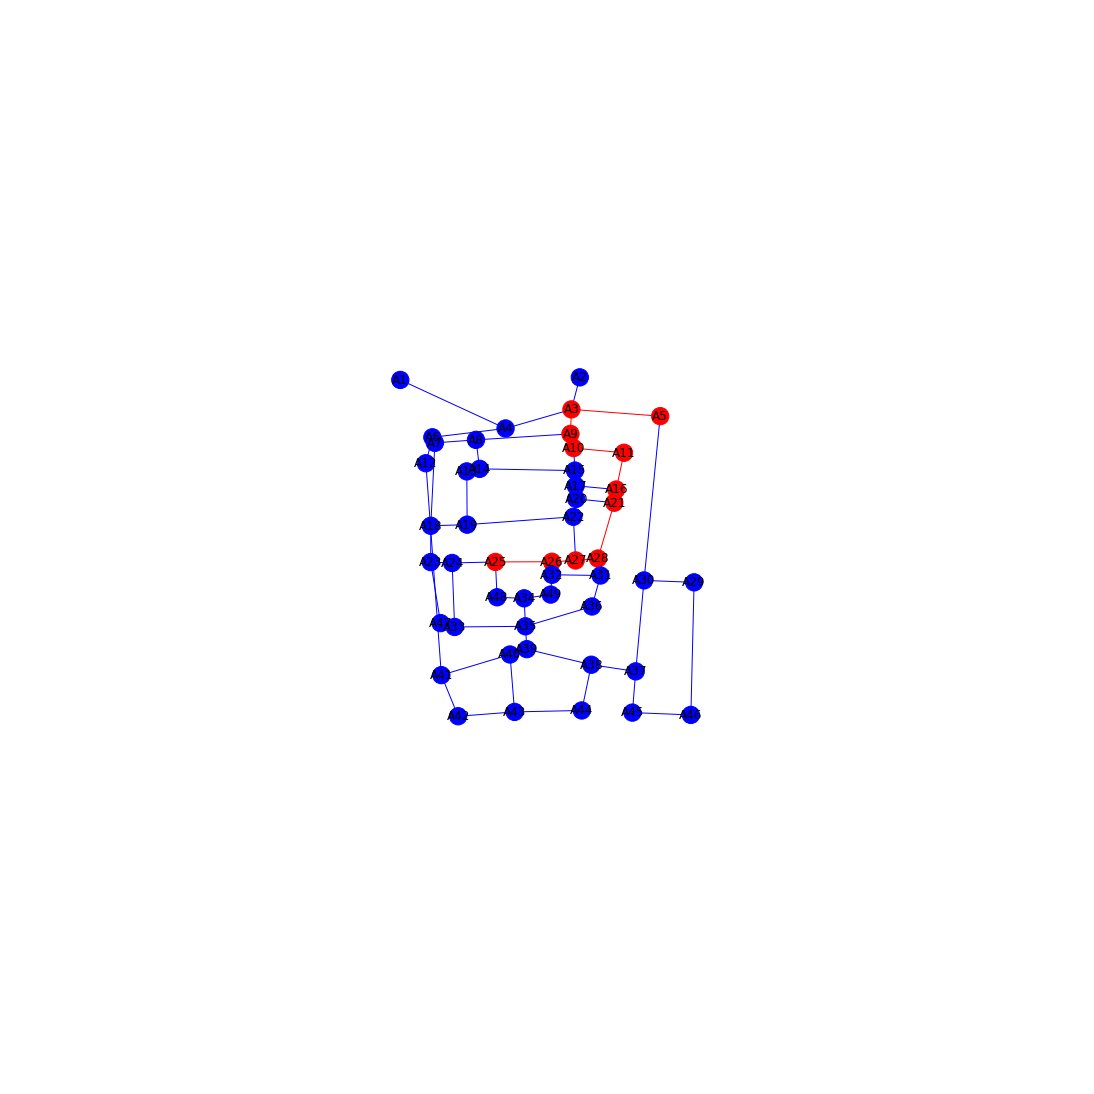

In [4]:
import networkx as nx
import header
import matplotlib.pyplot as plt

''' ambil data node dan edge dalam folder dilanjutkan mengisi jarak masing-masing edge '''
graphDict = {}
header.convertTxtToDict(graphDict)
header.isiJarakAntarNode(graphDict)

''' meminta masukan node asal dan node tujuan '''
print("\n\nBuka folder test dan buka file CaptureFixv1.0.png untuk melihat peta!")
print()
print()
nodeSrc = input("Masukkan node terdekat dengan posisi anda: ")
nodeDst = input("Masukkan node terdekat dengan tujuan anda: ")

''' olah data '''
jalurSolusi = header.AStarAlgorithm(graphDict,nodeSrc,nodeDst)['jalur']
print()
print("Jarak dari "+nodeSrc+" ke "+nodeDst+": ",end="")
print(header.AStarAlgorithm(graphDict,nodeSrc,nodeDst)['f(n)'])

''' visualisasi graph beserta jalur solusi jika ditemukan '''
G=nx.Graph()
for key in graphDict:
    if (key in jalurSolusi):
        G.add_node(key,pos=(graphDict[key]['coordinate'][1],graphDict[key]['coordinate'][0]),color='r')
    else:
        G.add_node(key,pos=(graphDict[key]['coordinate'][1],graphDict[key]['coordinate'][0]),color='b')
for key in graphDict:
    for keyEdge in graphDict[key]['edge']:
        if (key in jalurSolusi and keyEdge in jalurSolusi):
            G.add_edge(key,keyEdge,color='r')
        else:
            G.add_edge(key,keyEdge,color = 'b')
plt.figure(2, figsize=(15, 15))
colorsNode = nx.get_node_attributes(G,'color').values()
colorsEdge = nx.get_edge_attributes(G,'color').values()
pos = nx.get_node_attributes(G,'pos')
nx.draw(G,pos,edge_color = colorsEdge,node_color = colorsNode,with_labels=True)